<a href="https://colab.research.google.com/github/MatheusHenriqueDaSilva/data_science/blob/main/pro_acoes_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.model_selection import train_test_split
import yaml
import shap

##!pip install pandas pyarrow fastparquet

In [2]:
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]
ANOS=[2018,2019,2020,2021,2022,2023,2024]
dados = {}  # Dicionário para armazenar os DataFrames

for ano in ANOS:
  dados[f'data_{ano}'] = pd.read_fwf(f'/content/COTAHIST_A{ano}.TXT', widths=tamanho_campos, header=0)

  ## Nomear as colunas

  dados[f'data_{ano}'].columns = [
  "tipo_registro",
  "data_pregao",
  "cod_bdi",
  "cod_negociacao",
  "tipo_mercado",
  "noma_empresa",
  "especificacao_papel",
  "prazo_dias_merc_termo",
  "moeda_referencia",
  "preco_abertura",
  "preco_maximo",
  "preco_minimo",
  "preco_medio",
  "preco_ultimo_negocio",
  "preco_melhor_oferta_compra",
  "preco_melhor_oferta_venda",
  "numero_negocios",
  "quantidade_papeis_negociados",
  "volume_total_negociado",
  "preco_exercicio",
  "ìndicador_correcao_precos",
  "data_vencimento" ,
  "fator_cotacao",
  "preco_exercicio_pontos",
  "codigo_isin",
  "num_distribuicao_papel"]

  # Eliminar a última linha
  linha=len(dados[f'data_{ano}']["data_pregao"])
  dados[f'data_{ano}']=dados[f'data_{ano}'].drop(linha-1)

  # Ajustar valores com virgula (dividir os valores dessas colunas por 100)
  listaVirgula=[
  "preco_abertura",
  "preco_maximo",
  "preco_minimo",
  "preco_medio",
  "preco_ultimo_negocio",
  "preco_melhor_oferta_compra",
  "preco_melhor_oferta_venda",
  "volume_total_negociado",
  "preco_exercicio",
  "preco_exercicio_pontos"
  ]

  for coluna in listaVirgula:
      dados[f'data_{ano}'][coluna]=[i/100. for i in dados[f'data_{ano}'][coluna]]

  dados[f'data_{ano}'] = dados[f'data_{ano}'][(dados[f'data_{ano}']['tipo_mercado']==10) & (dados[f'data_{ano}']['cod_negociacao'] == 'ITUB4')]


FileNotFoundError: [Errno 2] No such file or directory: '/content/COTAHIST_A2018.TXT'

In [ ]:
data_itub4_save =  pd.concat([dados[f'data_2018'],dados[f'data_2019'],dados[f'data_2020'],dados[f'data_2021'],dados[f'data_2022'],dados[f'data_2023'],dados[f'data_2024']], axis = 0).reset_index()
data_itub4_save.to_parquet("data_itub4.parquet", engine="pyarrow", index=False)


,index,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1016,1,20180102,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,30810.0,11100600.0,483649086.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
1,3099,1,20180103,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,18377.0,14863800.0,654269523.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
2,5397,1,20180104,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,28294.0,15481700.0,696661801.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
3,7763,1,20180105,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,19882.0,10478300.0,472439105.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
4,10039,1,20180108,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,20228.0,8472100.0,381831069.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0


In [3]:
data_itub4 = pd.read_parquet("data_itub4.parquet", engine="pyarrow").reset_index(drop=True)
data_itub4.head()

,index,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1016,1,20180102,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,30810.0,11100600.0,483649086.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
1,3099,1,20180103,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,18377.0,14863800.0,654269523.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
2,5397,1,20180104,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,28294.0,15481700.0,696661801.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
3,7763,1,20180105,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,19882.0,10478300.0,472439105.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
4,10039,1,20180108,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,20228.0,8472100.0,381831069.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0


In [4]:
data_itub4.tail(
)

,index,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
1681,1347607,1,20241007,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,22970.0,23310400.0,818620449.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1682,1349245,1,20241008,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,33539.0,23103400.0,817031494.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1683,1351069,1,20241009,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,35673.0,20924100.0,729268413.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1684,1352647,1,20241010,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,27883.0,20487100.0,713223496.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1685,1354390,1,20241011,2.0,ITUB4,10,ITAUUNIBANCO,PN N1,NaN,R$,...,29848.0,16965500.0,588880130.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0


In [5]:
def generate_metadata(dataframe):

    metadata2 = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata2=metadata2.sort_values(by='tipo')
    metadata2 = metadata2.reset_index(drop=True)

    return metadata2

metadados = generate_metadata(data_itub4)
metadados.head(50)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,index,int64,0,0.0,1686
1,tipo_registro,int64,0,0.0,1
2,tipo_mercado,int64,0,0.0,1
3,preco_exercicio_pontos,float64,0,0.0,1
4,fator_cotacao,float64,0,0.0,1
5,data_vencimento,float64,0,0.0,1
6,ìndicador_correcao_precos,float64,0,0.0,1
7,preco_exercicio,float64,0,0.0,1
8,volume_total_negociado,float64,0,0.0,1686
9,quantidade_papeis_negociados,float64,0,0.0,1682


# Nova seção

In [6]:
lista_spec = ['quantidade_papeis_negociados','numero_negocios','preco_melhor_oferta_venda','preco_melhor_oferta_compra',
              'preco_medio','preco_minimo','preco_maximo','preco_abertura','num_distribuicao_papel','preco_ultimo_negocio']

data_itub4_clean = data_itub4.loc[:,lista_spec]
data_itub4_clean.shape



(1686, 10)

In [101]:

for i in lista_spec:
  data_itub4_clean[f'max20_{i}'] = data_itub4_clean[f'{i}'].rolling(window=20).max().fillna(0)
  data_itub4_clean[f'max60_{i}'] = data_itub4_clean[f'{i}'].rolling(window=60).max().fillna(0)
  data_itub4_clean[f'max120_{i}'] = data_itub4_clean[f'{i}'].rolling(window=120).max().fillna(0)
  data_itub4_clean[f'max240_{i}'] = data_itub4_clean[f'{i}'].rolling(window=240).max().fillna(0)
  data_itub4_clean[f'max480_{i}'] = data_itub4_clean[f'{i}'].rolling(window=480).max().fillna(0)
  data_itub4_clean[f'max720_{i}'] = data_itub4_clean[f'{i}'].rolling(window=720).max().fillna(0)
  data_itub4_clean[f'min20_{i}'] = data_itub4_clean[f'{i}'].rolling(window=20).min().fillna(0)
  data_itub4_clean[f'min60_{i}'] = data_itub4_clean[f'{i}'].rolling(window=60).min().fillna(0)
  data_itub4_clean[f'min120_{i}'] = data_itub4_clean[f'{i}'].rolling(window=120).min().fillna(0)
  data_itub4_clean[f'min240_{i}'] = data_itub4_clean[f'{i}'].rolling(window=240).min().fillna(0)
  data_itub4_clean[f'min480_{i}'] = data_itub4_clean[f'{i}'].rolling(window=480).min().fillna(0)
  data_itub4_clean[f'min720_{i}'] = data_itub4_clean[f'{i}'].rolling(window=720).min().fillna(0)
  data_itub4_clean[f'media20_{i}'] = data_itub4_clean[f'{i}'].rolling(window=20).mean().fillna(0)
  data_itub4_clean[f'media60_{i}'] = data_itub4_clean[f'{i}'].rolling(window=60).mean().fillna(0)
  data_itub4_clean[f'media120_{i}'] = data_itub4_clean[f'{i}'].rolling(window=120).mean().fillna(0)
  data_itub4_clean[f'media240_{i}'] = data_itub4_clean[f'{i}'].rolling(window=240).mean().fillna(0)
  data_itub4_clean[f'media480_{i}'] = data_itub4_clean[f'{i}'].rolling(window=480).mean().fillna(0)
  data_itub4_clean[f'media720_{i}'] = data_itub4_clean[f'{i}'].rolling(window=720).mean().fillna(0)

data_itub4_clean2 = data_itub4_clean.iloc[721:,:].reset_index(drop=True)

for i in lista_spec:
  data_itub4_clean2[f'razmax20_60_{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max60_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax60_120_{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax120_240_{i}'] = round(data_itub4_clean2[f'max120_{i}'],4)/round(data_itub4_clean2[f'max240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax240_480_{i}'] = round(data_itub4_clean2[f'max240_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax20_120_{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax60_240{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax120_480{i}'] = round(data_itub4_clean2[f'max120_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax20_240{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax60_480{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax20_480{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_60_{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min60_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin60_120_{i}'] = round(data_itub4_clean2[f'min60_{i}'],4)/round(data_itub4_clean2[f'min120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin120_240_{i}'] = round(data_itub4_clean2[f'min120_{i}'],4)/round(data_itub4_clean2[f'min240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin240_480_{i}'] = round(data_itub4_clean2[f'min240_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_120_{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin60_240{i}'] = round(data_itub4_clean2[f'min60_{i}'],4)/round(data_itub4_clean2[f'min240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin120_480{i}'] = round(data_itub4_clean2[f'min120_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_240{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin60_480{i}'] = round(data_itub4_clean2[f'min60_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_480{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_60_{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media60_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia60_120_{i}'] = round(data_itub4_clean2[f'media60_{i}'],4)/round(data_itub4_clean2[f'media120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia120_240_{i}'] = round(data_itub4_clean2[f'media120_{i}'],4)/round(data_itub4_clean2[f'media240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia240_480_{i}'] = round(data_itub4_clean2[f'media240_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_120_{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia60_240{i}'] = round(data_itub4_clean2[f'media60_{i}'],4)/round(data_itub4_clean2[f'media240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia120_480{i}'] = round(data_itub4_clean2[f'media120_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_240{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia60_480{i}'] = round(data_itub4_clean2[f'media60_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_480{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'raz_ref_media_20{i}'] = round(data_itub4_clean[f'{i}'],4)/round(data_itub4_clean2[f'media20_{i}'],4)
  data_itub4_clean2[f'raz_ref_media_60{i}'] = round(data_itub4_clean[f'{i}'],4)/round(data_itub4_clean2[f'media60_{i}'],4)
  data_itub4_clean2[f'raz_ref_media_120{i}'] = round(data_itub4_clean[f'{i}'],4)/round(data_itub4_clean2[f'media120_{i}'],4)




<ipython-input-101-84b8fd2c19fd>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_itub4_clean2[f'razmax20_60_{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max60_{i}'].fillna(0),4)
<ipython-input-101-84b8fd2c19fd>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_itub4_clean2[f'razmax60_120_{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max120_{i}'].fillna(0),4)
<ipython-input-101-84b8fd2c19fd>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usua

In [102]:
#data_itub4['var_preco_ultimo_negocio'] = data_itub4['preco_ultimo_negocio'].pct_change(-5).fillna(0)
data_itub4_clean2['target']  = data_itub4_clean2['preco_ultimo_negocio'].shift(-20)
# lista_anal = ['quantidade_papeis_negociados','numero_negocios','preco_melhor_oferta_venda','preco_melhor_oferta_compra',
#               'preco_medio','preco_minimo','preco_maximo','preco_abertura','num_distribuicao_papel','preco_ultimo_negocio','target']
data_itub4_clean3 = data_itub4_clean2.iloc[:-20,:].reset_index(drop=True)

data_itub4_clean3.shape

<ipython-input-102-af43e93bd673>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_itub4_clean2['target']  = data_itub4_clean2['preco_ultimo_negocio'].shift(-20)


(945, 521)

In [103]:
metadados = generate_metadata(data_itub4_clean)
metadados[metadados['qt_nulos'] >=1].head(30)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade


In [104]:
data_itub4_clean3.shape

(945, 521)

In [ ]:
data_itub4.shape

(1686, 27)

In [151]:
Lista_dados_pre_trat = data_itub4_clean3.iloc[:,:-1].columns
Lista_dados_pre_trat
data_all = pd.merge(data_itub4_clean3,data_itub4,how='left')

Lista_dados_pre_trat

joblib.dump(Lista_dados_pre_trat, "Lista_dados_pre_trat.pkl", compress=3)
Lista_dados_pre_trat_charge = joblib.load('/content/Lista_dados_pre_trat.pkl')

data_all.iloc[len(data_all.iloc[:-140,:]):,:].to_parquet("data_validacao.parquet", engine="pyarrow", index=False)
data_validacao = pd.read_parquet("data_validacao.parquet", engine="pyarrow").reset_index(drop=True)

data_validacao.head()
data_all.iloc[:-140,:].to_parquet("data_train_test.parquet", engine="pyarrow", index=False)
data_train_test = pd.read_parquet("data_train_test.parquet", engine="pyarrow")
data_train_test.tail()

,quantidade_papeis_negociados,numero_negocios,preco_melhor_oferta_venda,preco_melhor_oferta_compra,preco_medio,preco_minimo,preco_maximo,preco_abertura,num_distribuicao_papel,preco_ultimo_negocio,...,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin
800,28407100.0,38922.0,35.49,35.48,35.63,35.48,35.83,35.65,330.0,35.48,...,PN N1,NaN,R$,1.012414e+09,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
801,21460700.0,36373.0,34.17,34.16,34.38,34.16,34.73,34.70,331.0,34.16,...,PN ED N1,NaN,R$,7.378601e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
802,22703500.0,45046.0,0.00,0.00,34.16,33.87,34.38,34.20,331.0,34.26,...,PN ED N1,NaN,R$,7.756226e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
803,13553700.0,18079.0,34.36,34.32,34.34,34.16,34.44,34.29,331.0,34.36,...,PN ED N1,NaN,R$,4.654558e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
804,15712500.0,35309.0,34.79,34.77,34.69,34.40,34.85,34.62,331.0,34.78,...,PN ED N1,NaN,R$,5.450940e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1


In [153]:
# Lista_dados_pre_trat['index','data_pregao','especificacao_papel']
data_train_test.iloc[len(data_train_test.iloc[:-140,:]):,:].to_parquet("data_test.parquet", engine="pyarrow", index=False)
data_test = pd.read_parquet("data_test.parquet", engine="pyarrow").reset_index(drop=True)


data_train_test.iloc[:-140,:].to_parquet("data_train.parquet", engine="pyarrow", index=False)
data_train = pd.read_parquet("data_train.parquet", engine="pyarrow")

print(data_all.shape)
print(data_validacao.shape)
print(data_test.shape)
print(data_train.shape)

(945, 538)
(140, 538)
(140, 538)
(665, 538)


In [136]:
# FEATURE SELECTION
import lightgbm as lgb

X_train_temp = data_train[Lista_dados_pre_trat_charge]
Y_train = data_train['target']
X_test_temp = data_test[Lista_dados_pre_trat_charge]
Y_test = data_test['target']

clf = lgb.LGBMRegressor(n_estimators=100, random_state=43, verbose=-1)# troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X_train_temp, Y_train)

# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X_train_temp.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)
features


,Feature,Importance
1,numero_negocios,69
220,raz_ref_media_20quantidade_papeis_negociados,60
0,quantidade_papeis_negociados,54
452,raz_ref_media_60preco_abertura,52
453,raz_ref_media_120preco_abertura,49
...,...,...
31,max240_numero_negocios,0
32,max480_numero_negocios,0
33,max720_numero_negocios,0
209,razmin20_480quantidade_papeis_negociados,0


In [137]:
# Estabelecer um limite de corte, por exemplo, x% da importância máxima


selected_features = features['Feature'].iloc[:50].tolist()


joblib.dump(selected_features, "selected_features.pkl", compress=3)
selected_features_charge = joblib.load('/content/selected_features.pkl')

X_train = X_train_temp[selected_features_charge]
X_test = X_test_temp[selected_features_charge]

In [138]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn import metrics

list_estimators = [3,5,7,10, 20, 30, 40, 50]
space = {
    'n_estimators': hp.choice('n_estimators', list_estimators),  # Escolha entre esses valores
    'max_depth': hp.quniform('max_depth', 2, 3, 1),  # Inteiros de 3 a 15
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),  # Float entre 0.1 e 1.0
    'num_leaves': hp.quniform('num_leaves', 2, 6, 1),  # Inteiros de 2 a 15
}

def objetivo(params):
    modelo = lgb.LGBMRegressor(
        n_estimators=params['n_estimators'],
        max_depth=int(params['max_depth']),
        min_samples_split=params['min_samples_split'],
        num_leaves=int(params['num_leaves']),
        random_state=43
    )

    modelo.fit(X_train, Y_train)

    # Avaliar no conjunto de teste (holdout)
    Y_predi = modelo.predict(X_test)
    score = metrics.mean_absolute_error(Y_test, Y_predi)

    return score

trials = Trials()  # Salva o histórico das tentativas

best = fmin(
    fn=objetivo,  # Função a minimizar
    space=space,  # Espaço de busca
    algo=tpe.suggest,  # Algoritmo (TPE = Tree-structured Parzen Estimator)
    max_evals=50,  # Número de tentativas
    trials=trials  # Salva histórico
)

print("Melhores Hiperparâmetros:", best)


100%|██████████| 50/50 [00:02<00:00, 18.49trial/s, best loss: 0.9054661503439347]
Melhores Hiperparâmetros: {'max_depth': 3.0, 'min_samples_split': 0.7569610958115954, 'n_estimators': 7, 'num_leaves': 6.0}


In [139]:

modelo_final = lgb.LGBMRegressor(
        n_estimators=list_estimators[best["n_estimators"]],
        max_depth=int(best["max_depth"]),
        min_samples_split=best["min_samples_split"],
        num_leaves=int(best["num_leaves"]),
        random_state=43
)

modelo_final.fit(X_train, Y_train)

joblib.dump(modelo_final, "modelo_final.pkl", compress=3)
modelo_final_charge = joblib.load('/content/modelo_final.pkl')

In [140]:
from sklearn import metrics

X_valid = data_validacao[selected_features_charge]
Y_valid = data_validacao['target']

pred_train = modelo_final_charge.predict(X_train)
pred_test  = modelo_final_charge.predict(X_test)
pred_valid = modelo_final_charge.predict(X_valid)



metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste', 'Validação'],
    'média_real': [Y_train.mean(),Y_test.mean(),Y_valid.mean()],
    'média_predita': [pred_train.mean(),pred_test.mean(),pred_valid.mean()],
    'r2': [metrics.r2_score(Y_train, pred_train),metrics.r2_score(Y_test, pred_test),metrics.r2_score(Y_valid, pred_valid)],
    'MAE': [metrics.mean_absolute_error(Y_train, pred_train),metrics.mean_absolute_error(Y_test, pred_test),metrics.mean_absolute_error(Y_valid, pred_valid)],
    'MSE': [metrics.mean_squared_error(Y_train, pred_train),metrics.mean_squared_error(Y_test, pred_test),metrics.mean_squared_error(Y_valid, pred_valid)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(Y_train, pred_train)), np.sqrt(metrics.mean_squared_error(Y_test, pred_test)),np.sqrt(metrics.mean_squared_error(Y_valid, pred_valid))],
    'MAPE': [metrics.mean_absolute_percentage_error(Y_train, pred_train), metrics.mean_absolute_percentage_error(Y_test, pred_test), metrics.mean_absolute_percentage_error(Y_valid, pred_valid)]


    })
metrics_df

,Conjunto,média_real,média_predita,r2,MAE,MSE,RMSE,MAPE
0,Treino,27.368975,27.368975,0.904485,0.693552,0.926804,0.962707,0.025697
1,Teste,27.498385,27.484953,0.837464,0.905466,1.689556,1.299829,0.033624
2,Validação,33.883000,34.133320,-0.125163,1.808003,4.225605,2.055628,0.053362


In [123]:
X_train['predicao'] = pred_train
X_test['predicao'] = pred_test
X_valid['predicao'] = pred_valid

X_train['flag'] = 'treino'
X_test['flag'] = 'teste '
X_valid['flag'] = 'valid '
print(X_train.shape,X_test.shape, X_valid.shape)

abt_train = X_train.join(Y_train, how='left')
abt_test = X_test.join(Y_test, how='left')
abt_valid = X_valid.join(Y_valid, how='left')

print(abt_train.shape,abt_test.shape, abt_valid.shape)


abt_final =  pd.concat([abt_train,abt_test,abt_valid], axis = 0)

(644, 52) (161, 52) (140, 52)
(644, 53) (161, 53) (140, 53)


<ipython-input-123-c8279b5485bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['predicao'] = pred_train
<ipython-input-123-c8279b5485bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predicao'] = pred_test
<ipython-input-123-c8279b5485bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [134]:
abt_final.to_csv('abt_final.csv', index=False)
X_train.shape

len(feature_importances)
X_train.drop(['flag','predicao'],axis=1).shape


['treino']


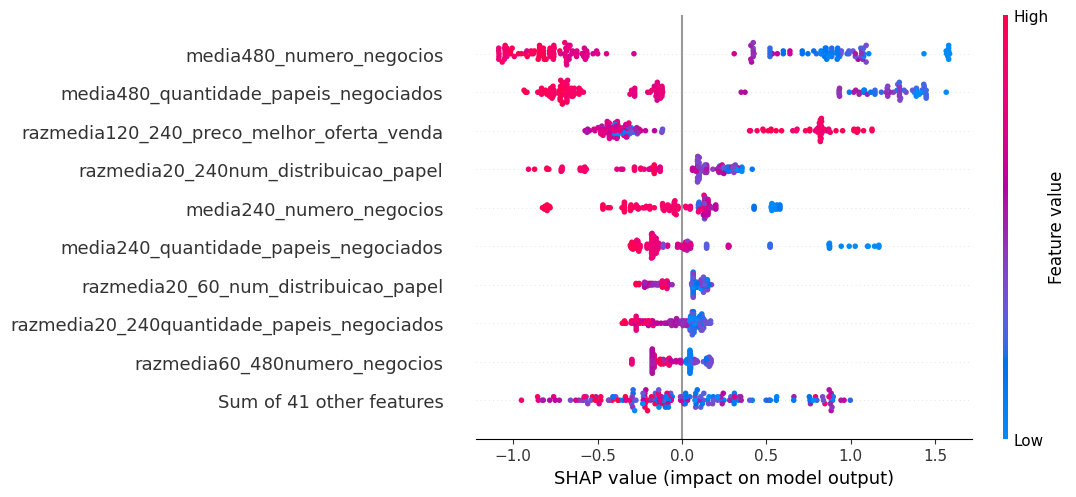

,Feature,Importance
17,media480_numero_negocios,21
39,media240_numero_negocios,17
38,media240_quantidade_papeis_negociados,14
37,media480_quantidade_papeis_negociados,14
33,razmedia120_240_preco_melhor_oferta_venda,14
42,razmedia20_240num_distribuicao_papel,13
30,razmedia20_240quantidade_papeis_negociados,11
1,raz_ref_media_20quantidade_papeis_negociados,9
48,razmedia60_120_numero_negocios,8
28,preco_abertura,8


In [142]:
# Obter importância das variáveis
feature_importances = modelo_final_charge.feature_importances_
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)
features


explainer = shap.TreeExplainer(modelo_final_charge)
shap_values = explainer(X_test)
# shap.summary_plot(shap_values, X_test)
shap.plots.beeswarm(shap_values,max_display=10)
features.head(10)

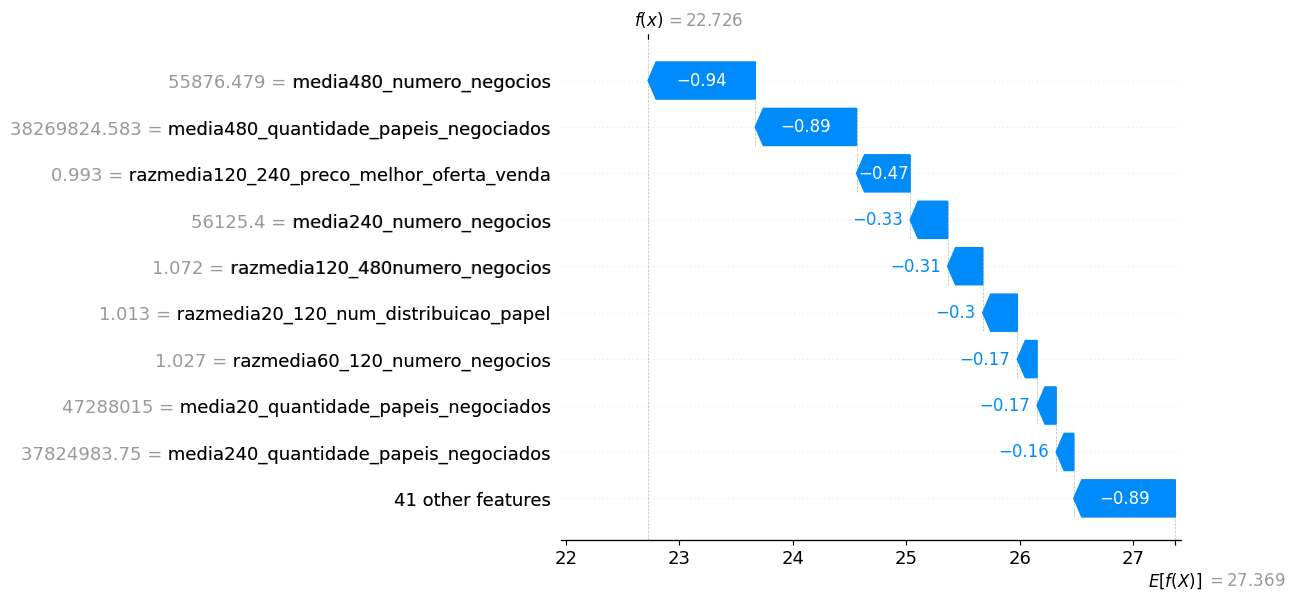

In [45]:
shap.plots.waterfall(shap_values[150],max_display=10)

